In [1]:
# Import libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Universities.csv", index_col = 'Univ')
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72
Columbia,1310,76,24,12,31510,88
Cornell,1280,83,33,13,21864,90
Dartmouth,1340,89,23,10,32162,95
Duke,1315,90,30,12,31585,95
Georgetown,1255,74,24,12,20126,92
Harvard,1400,91,14,11,39525,97


## Hierarchical Clustering

In [4]:
# Normalize function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df1 = norm_func(df)
df1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
CalTech,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
CMU,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
Columbia,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
Cornell,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
Dartmouth,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
Duke,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
Georgetown,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
Harvard,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000


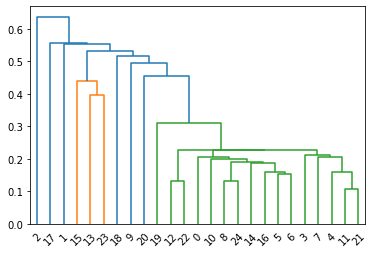

In [6]:
# Create Dendrogram
d = sch.dendrogram(sch.linkage(df1, method = 'single'))

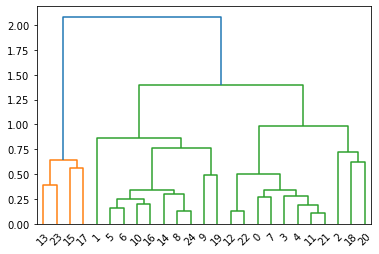

In [7]:
d = sch.dendrogram(sch.linkage(df1, method = 'complete'))

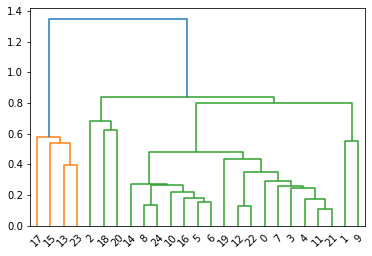

In [8]:
d = sch.dendrogram(sch.linkage(df1, method = 'average'))

In [9]:
# Agglomerative Clustering

In [10]:
# euclidean , 'l1' , 'l2', 'manhattan', 'cosine', or 'precomputed'

In [11]:
# create clusters
hc =  AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')

In [12]:
hc.fit_predict(df1)

array([0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [13]:
#save clusters for chart
y_hc = hc.fit_predict(df1)
# clusters = pd.DataFrame(y_hc, columns = ['Clusters'])

In [14]:
df1['h_clusterid']=y_hc

In [15]:
df1.h_clusterid.sort_values()

Univ
Brown           0
UVA             0
UPenn           0
UMichigan       0
UChicago        0
UCBerkeley      0
Stanford        0
Princeton       0
Northwestern    0
MIT             0
NotreDame       0
Harvard         0
Georgetown      0
Duke            0
Dartmouth       0
Cornell         0
Columbia        0
JohnsHopkins    0
Yale            0
UWisconsin      1
PennState       1
Purdue          1
TexasA&M        2
CalTech         3
CMU             4
Name: h_clusterid, dtype: int64

In [16]:
univ = pd.read_csv("Universities.csv")

In [17]:
univ['h_clusterid']=y_hc

In [18]:
univ.groupby(['h_clusterid'])['Univ'].apply(lambda x:tuple(x))

h_clusterid
0    (Brown, Columbia, Cornell, Dartmouth, Duke, Ge...
1                      (PennState, Purdue, UWisconsin)
2                                          (TexasA&M,)
3                                           (CalTech,)
4                                               (CMU,)
Name: Univ, dtype: object

In [19]:
univ[univ['Univ'].isin(['PennState', 'Purdue', 'UWisconsin'])]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
23,UWisconsin,1085,40,69,15,11857,71,1


## K Means

In [20]:
model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(df1)

KMeans(n_clusters=5)

In [21]:
model_kmeans.labels_

array([3, 1, 4, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 2, 3, 2, 3, 2, 0, 0, 0, 0,
       0, 2, 3])

In [22]:
md = pd.Series(model_kmeans.labels_)

In [23]:
# Complete-Linkage clustering - Wikipedia

In [24]:
univ['Labels'] = pd.Series(model_kmeans.labels_)
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid,Labels
0,Brown,1310,89,22,13,22704,94,0,3
1,CalTech,1415,100,25,6,63575,81,3,1
2,CMU,1260,62,59,9,25026,72,4,4
3,Columbia,1310,76,24,12,31510,88,0,3
4,Cornell,1280,83,33,13,21864,90,0,0
5,Dartmouth,1340,89,23,10,32162,95,0,3
6,Duke,1315,90,30,12,31585,95,0,3
7,Georgetown,1255,74,24,12,20126,92,0,0
8,Harvard,1400,91,14,11,39525,97,0,3
9,JohnsHopkins,1305,75,44,7,58691,87,0,3


In [25]:
univ.groupby(['Labels'])['Univ'].apply(lambda x:tuple(x))

Labels
0    (Cornell, Georgetown, Northwestern, NotreDame,...
1                                           (CalTech,)
2            (PennState, Purdue, TexasA&M, UWisconsin)
3    (Brown, Columbia, Dartmouth, Duke, Harvard, Jo...
4                                               (CMU,)
Name: Univ, dtype: object

## DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [27]:
from sklearn.datasets import make_moons
x, y = make_moons(100)
data = pd.DataFrame(x)
data.columns=['f1','f2']
data['class']=y
data.head()

,f1,f2,class
0,-0.159600,0.987182,0
1,1.462538,-0.386599,1
2,0.238554,-0.148228,1
3,0.871319,0.490718,0
4,1.572117,-0.320172,1


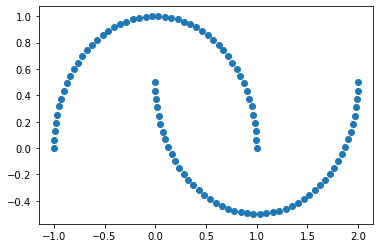

In [28]:
plt.scatter(data['f1'], data['f2'],cmap=plt.cm.Accent)

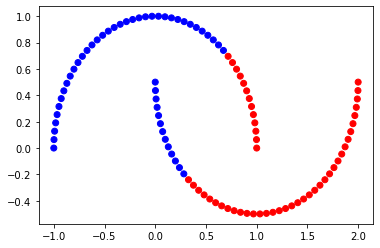

In [29]:
# Using Kmeans
model = KMeans(n_clusters=2, max_iter=600, algorithm='auto')
model.fit(data.iloc[:,:2])
plt.scatter(data['f1'],data['f2'], c=model.labels_, cmap = plt.cm.bwr_r)

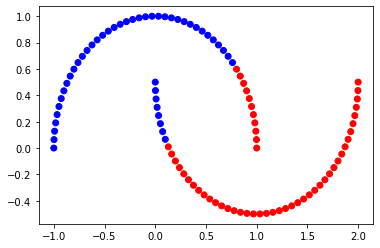

In [30]:
# Using Hierarchical

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'complete')
plt.scatter(data['f1'],data['f2'], c=cluster.fit_predict(data.iloc[:,:2]), cmap = plt.cm.bwr_r)

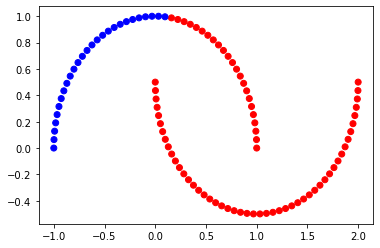

In [31]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'average')
plt.scatter(data['f1'],data['f2'], c=cluster.fit_predict(data.iloc[:,:2]), cmap = plt.cm.bwr_r)

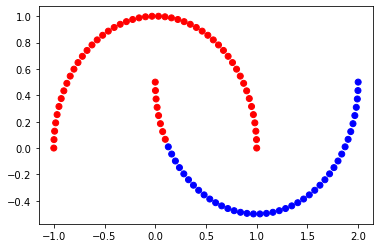

In [32]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'ward')
plt.scatter(data['f1'],data['f2'], c=cluster.fit_predict(data.iloc[:,:2]), cmap = plt.cm.bwr_r)

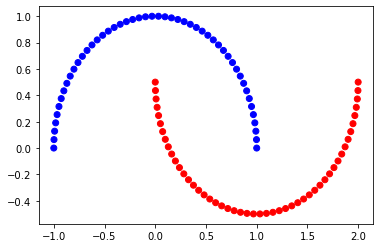

In [33]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'single')
plt.scatter(data['f1'],data['f2'], c=cluster.fit_predict(data.iloc[:,:2]), cmap = plt.cm.bwr_r)

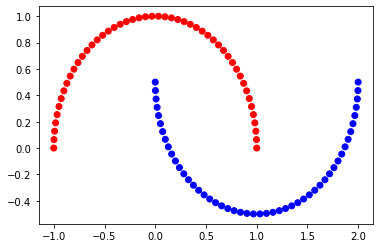

In [34]:
# DBSCAN

dbs = DBSCAN(min_samples = 2, eps =0.2)
class_pr=dbs.fit_predict(data.iloc[:,:2])
plt.scatter(data['f1'], data['f2'], c=class_pr, cmap=plt.cm.bwr_r)

### finding the optimal number of clusters

In [35]:
iris = sns.load_dataset('iris')

In [36]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
42,4.4,3.2,1.3,0.2,setosa
58,6.6,2.9,4.6,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
36,5.5,3.5,1.3,0.2,setosa
103,6.3,2.9,5.6,1.8,virginica
81,5.5,2.4,3.7,1.0,versicolor
49,5.0,3.3,1.4,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
65,6.7,3.1,4.4,1.4,versicolor


In [37]:
nc = [2,3,4,5,6,7,8,9]
iner = []
for i in nc:
    km = KMeans(i)
    km.fit(iris.iloc[:,:4])
    iner.append(km.inertia_)

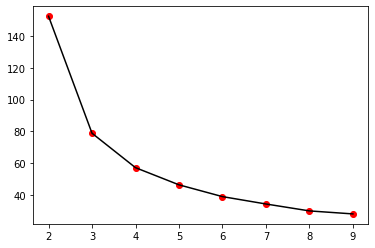

In [38]:
plt.plot(nc,iner,color = 'black')
plt.scatter(nc,iner,color='red')
plt.show()

### Silhoutte Score

In [39]:
from sklearn.metrics import silhouette_score as sil

In [40]:
nc = [2,3,4,5,6,7,8,9]
sc_score = []
for i in nc:
    km = KMeans(i)
    y=km.fit_predict(iris.iloc[:,:4])
    sc_score.append(sil(iris.iloc[:,:4], y))

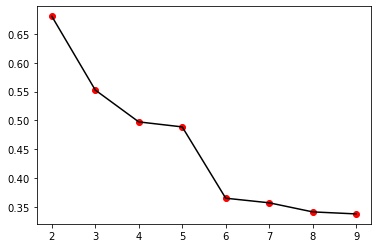

In [41]:
plt.plot(nc,sc_score,color = 'black')
plt.scatter(nc,sc_score,color='red')
plt.show()

## Calinski harabaz score

In [42]:
from sklearn.metrics import calinski_harabasz_score as chs

In [43]:
nc = [2,3,4,5,6,7,8,9]
chs_score = []
for i in nc:
    km = KMeans(i)
    y=km.fit_predict(iris.iloc[:,:4])
    chs_score.append(chs(iris.iloc[:,:4], y))

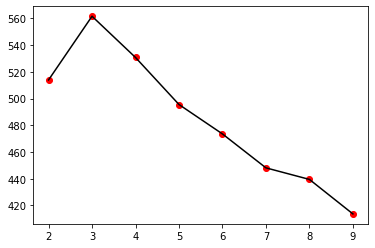

In [44]:
plt.plot(nc,chs_score,color = 'black')
plt.scatter(nc,chs_score,color='red')
plt.show()